# Final Project: Hugging Face 

This code uses : [https://huggingface.co/docs/datasets/en/quickstart#vision]

In [18]:
import numpy as np 
import evaluate
import torch
import matplotlib.pyplot as plt

from datasets import load_dataset, Image
from transformers import AutoImageProcessor
from torchvision.transforms import Compose, ColorJitter, ToTensor,  RandomResizedCrop, Normalize
from transformers import DefaultDataCollator
from torch.utils.data import DataLoader
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer
from transformers import ViTFeatureExtractor, ViTForImageClassification, ViTImageProcessor
from transformers import pipeline
from PIL import Image




### Checking Validity of Model

In [19]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-classification", model="brigettesegovia/vit-base-beans")

config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/110M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFSwinForImageClassification.

All the weights of TFSwinForImageClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFSwinForImageClassification for predictions without further training.


preprocessor_config.json:   0%|          | 0.00/337 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [20]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor = AutoImageProcessor.from_pretrained("brigettesegovia/vit-base-beans")
model = AutoModelForImageClassification.from_pretrained("brigettesegovia/vit-base-beans")

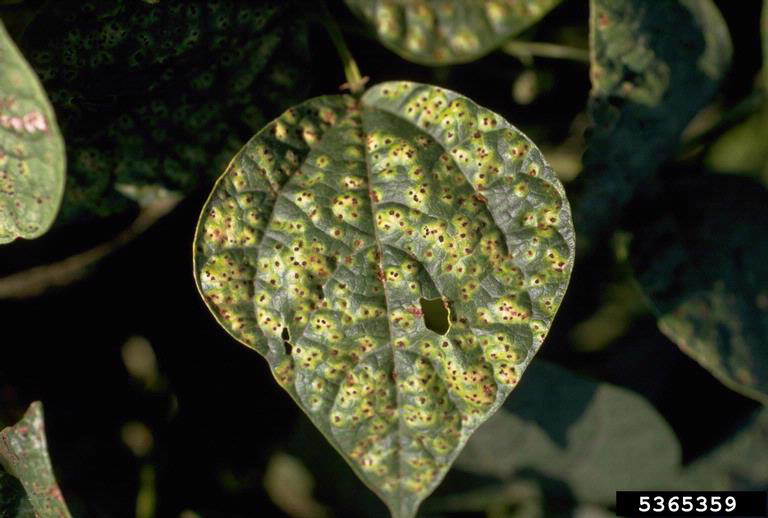

In [21]:
# loading data
def visualize_leafs(folder_name):
    images = [] 
    # folder_name is a string 
    # load every image that begins with the folder_name
    for i in range(0, 5):
        image_path = f"{folder_name}/{folder_name}_{i}.jpg"
        images.append(Image.open(image_path))
    return images

images_angular_leafspot = visualize_leafs("angular_leafspot")
images_healthy = visualize_leafs("healthy")
images_bean_rust = visualize_leafs("bean_rust")

images_bean_rust[1]

In [22]:
# load the image processor and model from the hub 

repo_name = 'brigettesegovia/plant_model'

image_processor = AutoImageProcessor.from_pretrained(repo_name)
model = AutoModelForImageClassification.from_pretrained(repo_name)

In [23]:
# prepare image for the model
def prepare_image(image_list):
    encoding = []
    for image in image_list:
        encoding.append(image_processor(image.convert("RGB"), return_tensors="pt"))
    return encoding



# encoding = image_processor(image.convert("RGB"), return_tensors="pt")

encoding_angular_leafspot = prepare_image(images_angular_leafspot)
encoding_healthy = prepare_image(images_healthy)
encoding_bean_rust = prepare_image(images_bean_rust)

print(encoding_bean_rust[0].pixel_values.shape) # checking for the expected output 

torch.Size([1, 3, 224, 224])


In [24]:
def predictions(encoding_list):
    for encoding in encoding_list:
        # foward pass
        with torch.no_grad(): #diable gradient computation because this is inference, not training
            outputs = model(**encoding)
            logits = outputs.logits

        predicted_class_idx = logits.argmax(-1).item()
        print("Predicted class:", model.config.id2label[predicted_class_idx])

predictions_angular_leafspot = predictions(encoding_angular_leafspot)
predictions_healthy = predictions(encoding_healthy)
predictions_bean_rust = predictions(encoding_bean_rust)

Predicted class: angular leaf spot
Predicted class: angular leaf spot
Predicted class: angular leaf spot
Predicted class: angular leaf spot
Predicted class: angular leaf spot
Predicted class: healthy
Predicted class: healthy
Predicted class: healthy
Predicted class: healthy
Predicted class: healthy
Predicted class: bean rust
Predicted class: bean rust
Predicted class: bean rust
Predicted class: bean rust
Predicted class: bean rust


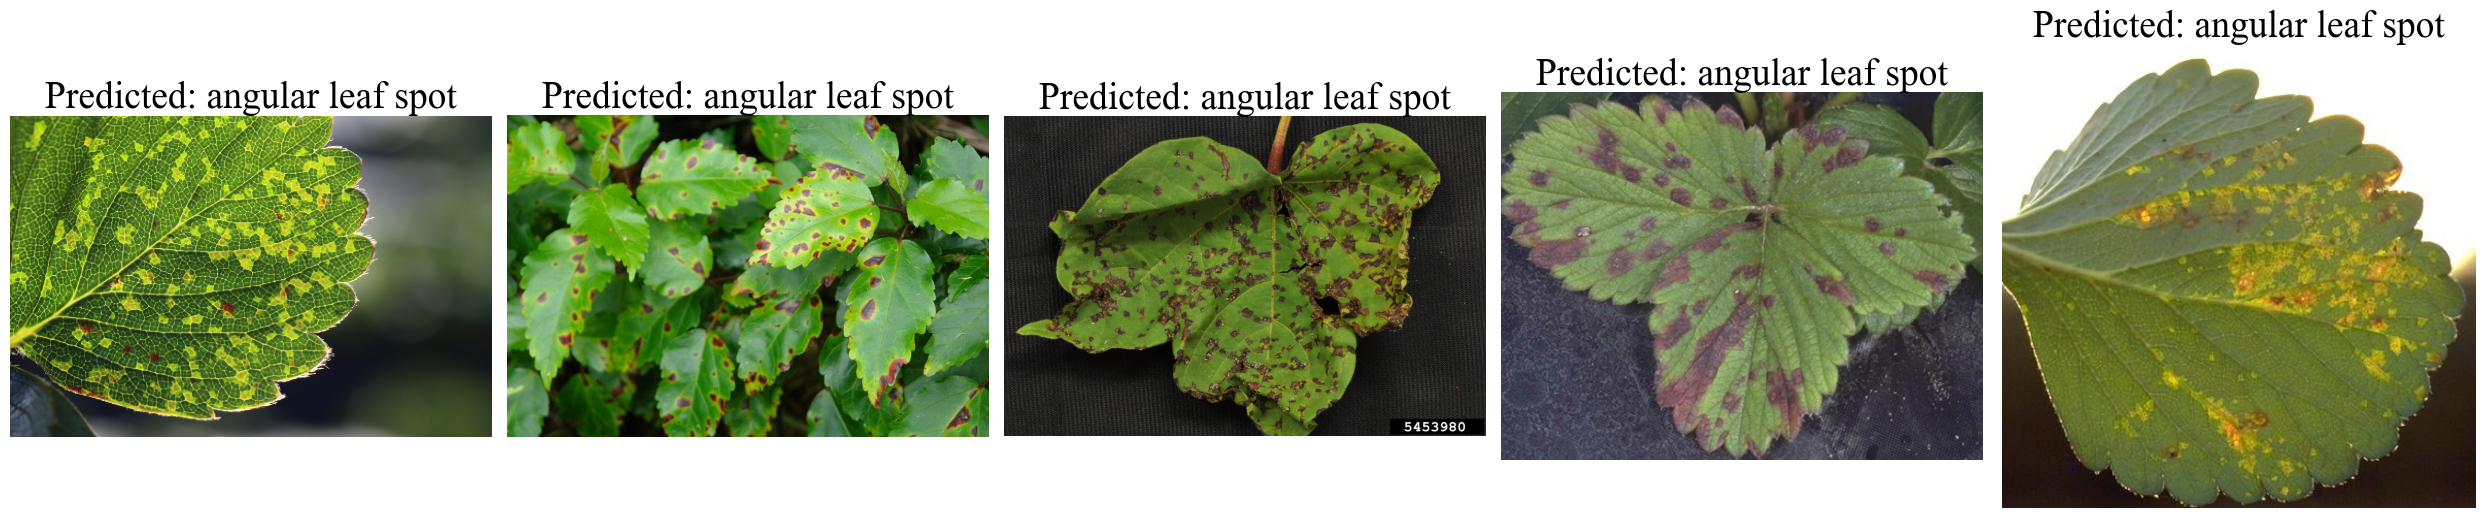

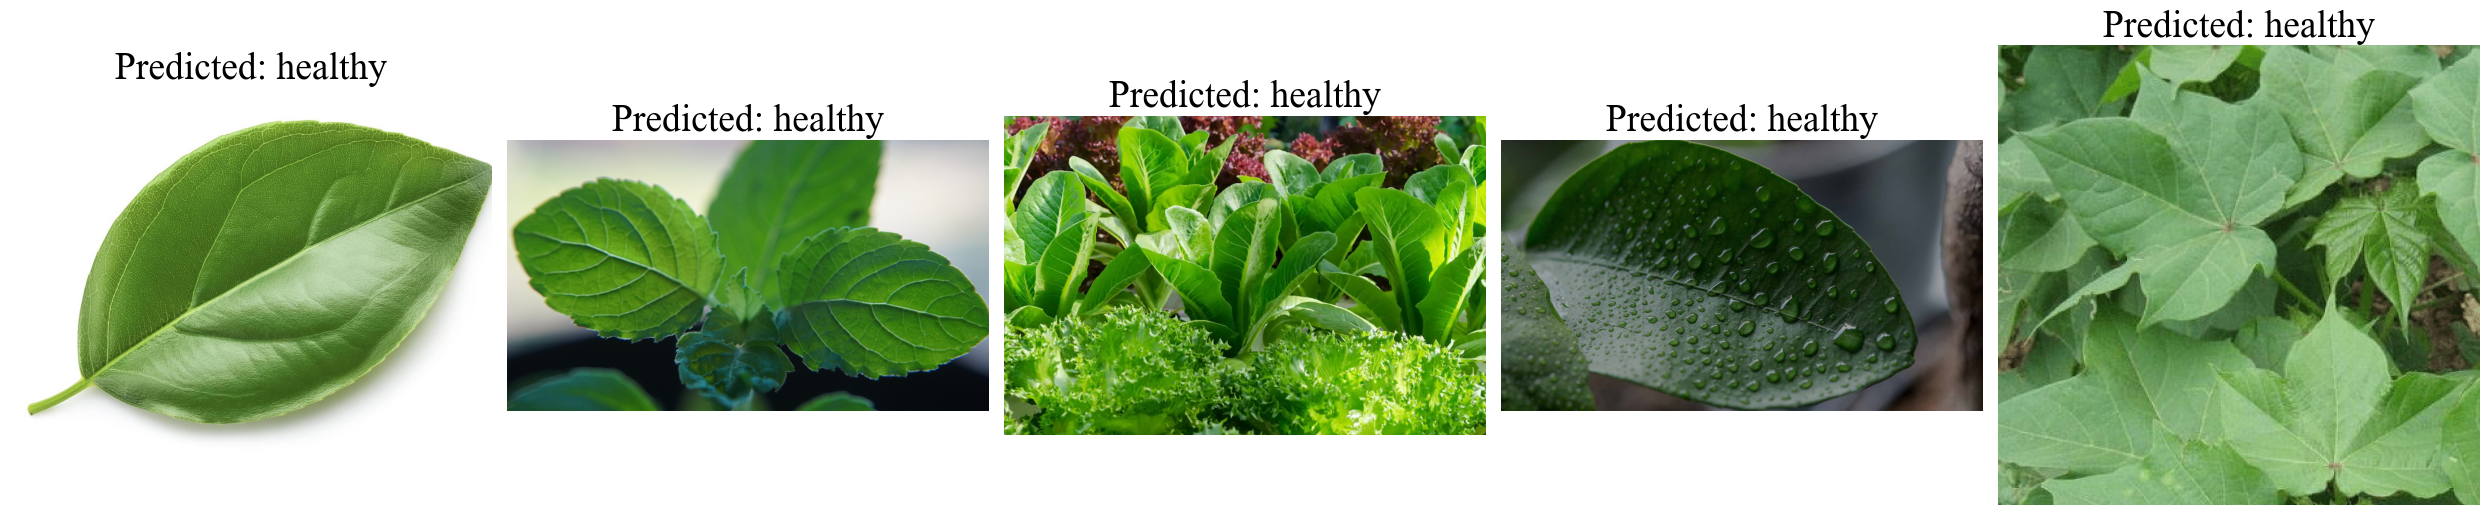

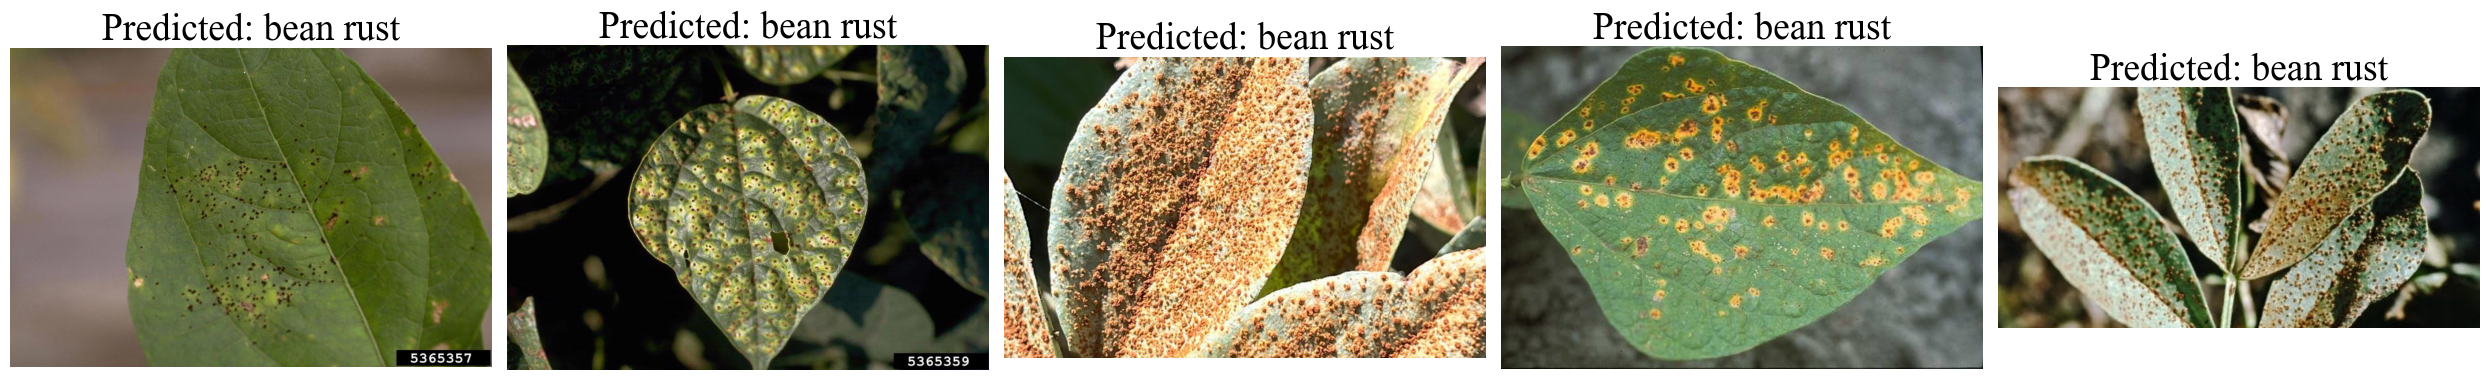

In [25]:
def display_images_with_predictions(images, predictions, image_size=(5, 5)):
    # fig, axes = plt.subplots(1, len(images), figsize=(20, 7))
    fig, axes = plt.subplots(1, len(images), figsize=(image_size[0] * len(images), image_size[-1]))
    for img, pred, ax in zip(images, predictions, axes):
        ax.imshow(img)
        ax.set_title(f"Predicted: {pred}", font='Times New Roman', fontsize=27)
        ax.axis('off')
    plt.tight_layout()
    plt.savefig(f"final_project_im/predictions{"".join(pred.split())}.png", dpi=250)
    plt.show()


# Get predictions for each set of images
predictions_angular_leafspot = [model.config.id2label[logits.argmax(-1).item()] for encoding in encoding_angular_leafspot for logits in [model(**encoding).logits]]
predictions_healthy = [model.config.id2label[logits.argmax(-1).item()] for encoding in encoding_healthy for logits in [model(**encoding).logits]]
predictions_bean_rust = [model.config.id2label[logits.argmax(-1).item()] for encoding in encoding_bean_rust for logits in [model(**encoding).logits]]

# Display images with their predictions
display_images_with_predictions(images_angular_leafspot, predictions_angular_leafspot)
display_images_with_predictions(images_healthy, predictions_healthy)
display_images_with_predictions(images_bean_rust, predictions_bean_rust)